In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt

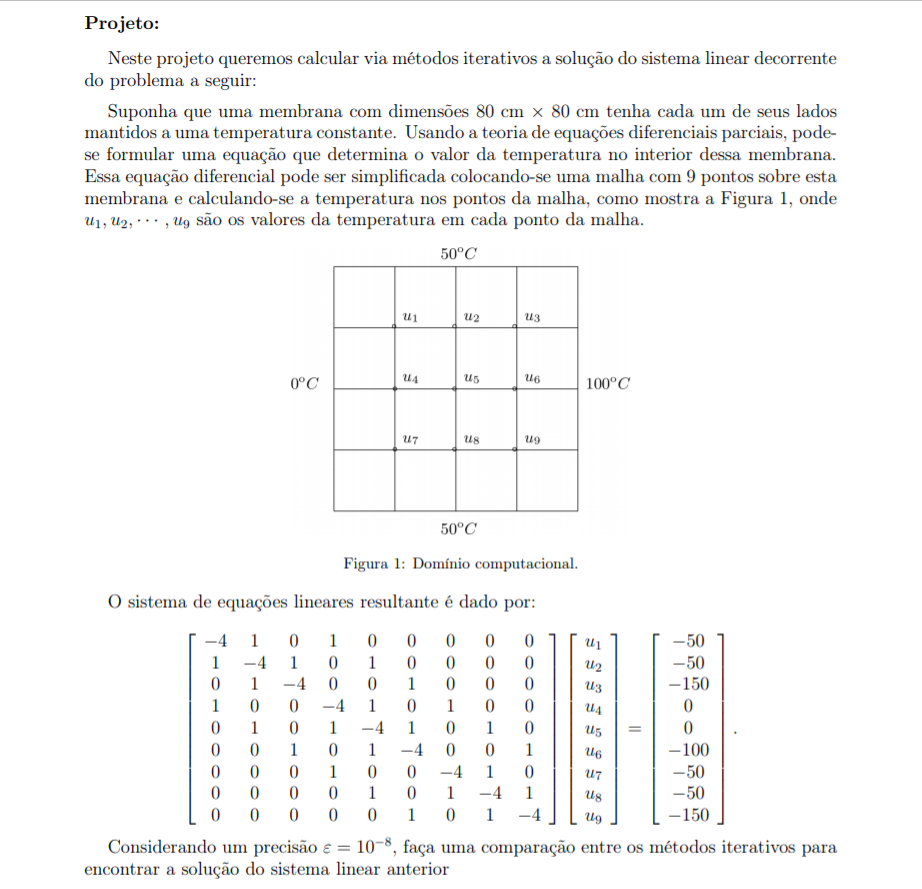

In [2]:
def SOR(A, b, omega, TOL, initial_guess=None):

    start = time.time()
    
    if initial_guess == None:
        initial_guess = np.zeros(len(A[0]))
    
    n = len(A[0])
    
    iterations = 0
    x = np.zeros_like(initial_guess)
    x_new = np.zeros_like(x)
    
    erro_lista = np.ones(n)
    erro = 1
    erro_lista_plot = []
    iterations_lista = []

    i = 0
    while erro > TOL:
        for i in range(0,n,1):
            soma= 0
            for j in range (0,n,1):
                if (j != i): 
                    soma = soma + A[i,j]*x[j]
            x_new = (1-omega)*x[i] + omega*(b[i] - soma)/A[i,i]
            erro_lista[i] = np.abs(x_new - x[i])
            x[i] = x_new
        erro = np.max(erro_lista)
        erro_lista_plot.append(erro)
        iterations += 1
    
    for i in range(iterations):
        iterations_lista.append(i)
    
    end = time.time()
    total_time = end - start
    
        
    return x, iterations, erro, total_time, iterations_lista, erro_lista_plot
    
                            
    

In [3]:
def jacobi(A, b, TOL, initial_guess=None): 
    
    start = time.time()
    if initial_guess == None:
        initial_guess = np.zeros(len(A[0]))
    
    D = np.diag(A)
    R = A - np.diagflat(D)
    
    iterations = 0
    x = np.zeros_like(initial_guess)
    x_new = np.zeros_like(x)
    erro = 1
    erro_lista = []
    erro_lista_plot = []
    iterations_lista = []
    
    while erro > TOL:
        iterations += 1
        x_new = (b - np.dot(R,x)) / D
        for i in range(len(x)):
            erro_lista.append(np.abs(x_new[i] - x[i]))
            erro = max(erro_lista)
        erro_lista_plot.append(erro)
        erro_lista = []
            
        x = x_new
    
    for i in range(iterations):
        iterations_lista.append(i)
    
    end = time.time()    
    total_time = end-start
    
    return x_new, iterations, erro, total_time, iterations_lista, erro_lista_plot


In [4]:
def gauss_seidel(A, b, TOL, initial_guess=None):
    
    start = time.time()
    
    if initial_guess == None:
        initial_guess = np.zeros(len(A[0]))
    
    n = len(A[0])
    
    iterations = 0
    x = np.zeros_like(initial_guess)
    x_new = np.zeros_like(x)
    
    erro_lista = np.ones(n)
    erro = 1
    erro_lista_plot = []
    iterations_lista = []

    i = 0
    while erro > TOL:
        for i in range(0,n,1):
            soma= 0
            for j in range (0,n,1):
                if (j != i): 
                    soma = soma + A[i,j]*x[j]
            x_new = (b[i] - soma)/A[i,i]
            erro_lista[i] = np.abs(x_new - x[i])
            x[i] = x_new
        erro = np.max(erro_lista)
        erro_lista_plot.append(erro)
        iterations += 1
    
    for i in range(iterations):
        iterations_lista.append(i)
    
    end = time.time()
    total_time = end - start
    
        
    return x, iterations, erro, total_time, iterations_lista, erro_lista_plot
    

In [5]:
A = -4*np.eye(9)
for i in range(0,6):
    A[i][i+3] = 1
    A[i+3][i] = 1

A[0][1] = 1
A[1][0] = 1
A[1][2] = 1
A[2][1] = 1
A[3][4] = 1
A[4][3] = 1
A[5][4] = 1
A[4][5] = 1
A[6][7] = 1
A[7][6] = 1
A[8][7] = 1
A[7][8] = 1

In [6]:
b = np.array([-50, -50, -150, 0, 0, -100, -50, -50, -150])

Solução por Jacobi: [32.14285713 49.99999999 67.85714285 28.57142856 49.99999998 71.42857142
 32.14285713 49.99999999 67.85714285]
Número de Iterações: 64
Erro: 5.820766091346741e-09
Tempo necessário: 0.00964665412902832 s


Text(0.5, 1.0, 'Erro de Jacobi')

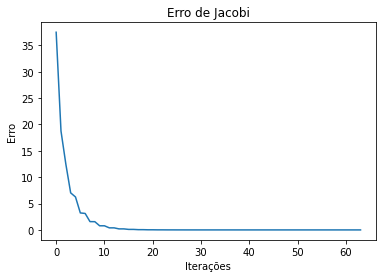

In [7]:
x, iterations, erro, tempo, iterations_lista, erro_lista_plot = jacobi(A, b, 1e-8)
print("Solução por Jacobi:", np.array(x))
print("Número de Iterações:", iterations)
print("Erro:", erro)
print("Tempo necessário:", tempo, "s")

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.set_ylabel('Erro')
ax1.set_xlabel('Iterações')

plt.plot(np.array(iterations_lista),np.array(erro_lista_plot))
plt.title("Erro de Jacobi")

Solução por Gauss Seidel: [32.14285714 49.99999999 67.85714285 28.57142857 49.99999999 71.42857143
 32.14285714 50.         67.85714286]
Número de Iterações: 34
Erro: 6.366462912410498e-09
Tempo necessário: 0.0029904842376708984 s


Text(0.5, 1.0, 'Erro de Gauss Seidel')

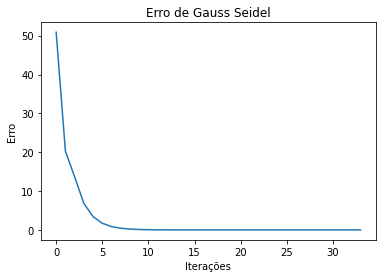

In [8]:
x, iterations, erro, tempo, iterations_lista, erro_lista_plot = gauss_seidel(A, b, 1e-8)
print("Solução por Gauss Seidel:", np.array(x))
print("Número de Iterações:", iterations)
print("Erro:", erro)
print("Tempo necessário:", tempo, "s")

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.set_ylabel('Erro')
ax1.set_xlabel('Iterações')

plt.plot(np.array(iterations_lista),np.array(erro_lista_plot))
plt.title("Erro de Gauss Seidel")

Solução por Relaxações Sucessivas: [32.14285714 50.         67.85714286 28.57142857 50.         71.42857143
 32.14285714 50.         67.85714286]
Número de Iterações: 35
Erro: 4.968157440998766e-09
Tempo necessário: 0.008967161178588867 s


Text(0.5, 1.0, 'Erro de SOR para W = 1.5')

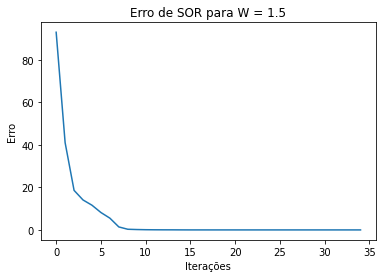

In [9]:
x, iterations, erro, tempo, iterations_lista, erro_lista_plot = SOR(A, b, omega=1.5, TOL=1e-8)
print("Solução por Relaxações Sucessivas:", np.array(x))
print("Número de Iterações:", iterations)
print("Erro:", erro)
print("Tempo necessário:", tempo, "s")

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.set_ylabel('Erro')
ax1.set_xlabel('Iterações')

plt.plot(np.array(iterations_lista),np.array(erro_lista_plot))
plt.title("Erro de SOR para W = 1.5")

In [10]:
x = np.linalg.solve(A,b)
print("Solução exata:", np.array(x))

Solução exata: [32.14285714 50.         67.85714286 28.57142857 50.         71.42857143
 32.14285714 50.         67.85714286]


Text(0.5, 1.0, 'Erros comparados')

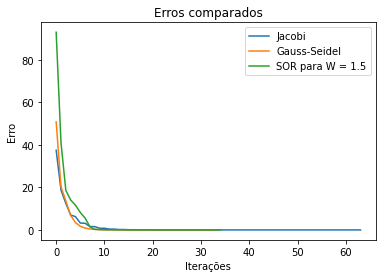

In [11]:
x_jacobi, iterations_jacobi, erro_jacobi, tempo_jacobi, iterations_lista_jacobi, erro_lista_plot_jacobi = jacobi(A, b, 1e-8)
x_gauss_seidel, iterations_gauss_seidel, erro_gauss_seidel, tempo_gauss_seidel, iterations_lista_gauss_seidel, erro_lista_plot_gauss_seidel = gauss_seidel(A, b, 1e-8)
x_SOR, iterations_SOR, erro_SOR, tempo_SOR, iterations_lista_SOR, erro_lista_plot_SOR = SOR(A, b, omega=1.5, TOL=1e-8)

iter_jacobi = iterations_lista_jacobi
erro_jacobi = erro_lista_plot_jacobi

iter_gauss_seidel = iterations_lista_gauss_seidel
erro_gauss_seidel = erro_lista_plot_gauss_seidel

iter_SOR = iterations_lista_SOR
erro_SOR = erro_lista_plot_SOR


fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.set_ylabel('Erro')
ax1.set_xlabel('Iterações')
plt.plot(iter_jacobi, erro_jacobi)
plt.plot(iter_gauss_seidel, erro_gauss_seidel)
plt.plot(iter_SOR, erro_SOR)

plt.legend(["Jacobi", "Gauss-Seidel", "SOR para W = 1.5"])
plt.title("Erros comparados")


Iterações para SOR com W=0.5: 108
Iterações para SOR com W=0.9: 43
Iterações para SOR com W=1.2: 17
Iterações para SOR com W=1.5: 35



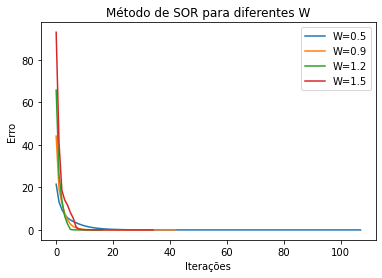

In [12]:
#Avaliando diferentes valores de Omega para o método SOR
W = [0.5, 0.9, 1.2, 1.5]
iterations_lista_W1 = np.zeros_like(W)
erro_lista_plot_W1 = np.zeros_like(W)

iterations_lista_W2 = np.zeros_like(W)
erro_lista_plot_W2 = np.zeros_like(W)

iterations_lista_W3 = np.zeros_like(W)
erro_lista_plot_W3 = np.zeros_like(W)

iterations_lista_W4 = np.zeros_like(W)
erro_lista_plot_W4 = np.zeros_like(W)

x_W1, iterations_W1, erro_W1, tempo_W1, iterations_lista_W1, erro_lista_plot_W1 = SOR(A, b, omega=W[0], TOL=1e-8)
x_W2, iterations_W2, erro_W2, tempo_W2, iterations_lista_W2, erro_lista_plot_W2 = SOR(A, b, omega=W[1], TOL=1e-8)
x_W3, iterations_W3, erro_W3, tempo_W3, iterations_lista_W3, erro_lista_plot_W3 = SOR(A, b, omega=W[2], TOL=1e-8)
x_W1, iterations_W4, erro_W4, tempo_W4, iterations_lista_W4, erro_lista_plot_W4 = SOR(A, b, omega=W[3], TOL=1e-8)


fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.set_ylabel('Erro')
ax1.set_xlabel('Iterações')
plt.plot(iterations_lista_W1, erro_lista_plot_W1)
plt.plot(iterations_lista_W2, erro_lista_plot_W2)
plt.plot(iterations_lista_W3, erro_lista_plot_W3)
plt.plot(iterations_lista_W4, erro_lista_plot_W4)

plt.legend(["W=0.5", "W=0.9", "W=1.2","W=1.5"])
plt.title("Método de SOR para diferentes W")
    
print("Iterações para SOR com W=0.5:", iterations_W1)
print("Iterações para SOR com W=0.9:", iterations_W2)
print("Iterações para SOR com W=1.2:", iterations_W3)
print("Iterações para SOR com W=1.5:", iterations_W4)
print("")
    

In [13]:
x_jacobi, iterations_jacobi, erro_jacobi, tempo_jacobi, iterations_lista_jacobi, erro_lista_plot_jacobi = jacobi(A, b, 1e-8)
x_gauss_seidel, iterations_gauss_seidel, erro_gauss_seidel, tempo_gauss_seidel, iterations_lista_gauss_seidel, erro_lista_plot_gauss_seidel = gauss_seidel(A, b, 1e-8)
x_SOR, iterations_SOR, erro_SOR, tempo_SOR, iterations_lista_SOR, erro_lista_plot_SOR = SOR(A, b, omega=1.5, TOL=1e-8)

print("Iterações para o Método de Jacobi:", iterations_jacobi, ", realizadas em:", tempo_jacobi,'s')
print("Iterações para o Método de Gauss-Seidel:", iterations_gauss_seidel, ", realizadas em:", tempo_gauss_seidel,'s')
print("Iterações para o Método de SOR com W=1.5:", iterations_SOR, ", realizadas em:", tempo_SOR,'s')

Iterações para o Método de Jacobi: 64 , realizadas em: 0.001996278762817383 s
Iterações para o Método de Gauss-Seidel: 34 , realizadas em: 0.0030329227447509766 s
Iterações para o Método de SOR com W=1.5: 35 , realizadas em: 0.00394749641418457 s


Iterações para SOR com W=0.5: 108
Iterações para SOR com W=0.9: 43
Iterações para SOR com W=1.2: 17
Iterações para SOR com W=1.5: 35
Iterações para Jacobi: 64
Iterações para Gauss-Seidel: 34


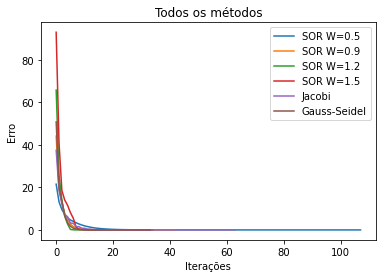

In [14]:
#Comparando todos os métodos e os diferentes valores de W:
W = [0.5, 0.9, 1.2, 1.5]
iterations_lista_W1 = np.zeros_like(W)
erro_lista_plot_W1 = np.zeros_like(W)

iterations_lista_W2 = np.zeros_like(W)
erro_lista_plot_W2 = np.zeros_like(W)

iterations_lista_W3 = np.zeros_like(W)
erro_lista_plot_W3 = np.zeros_like(W)

iterations_lista_W4 = np.zeros_like(W)
erro_lista_plot_W4 = np.zeros_like(W)

x_W1, iterations_W1, erro_W1, tempo_W1, iterations_lista_W1, erro_lista_plot_W1 = SOR(A, b, omega=W[0], TOL=1e-8)
x_W2, iterations_W2, erro_W2, tempo_W2, iterations_lista_W2, erro_lista_plot_W2 = SOR(A, b, omega=W[1], TOL=1e-8)
x_W3, iterations_W3, erro_W3, tempo_W3, iterations_lista_W3, erro_lista_plot_W3 = SOR(A, b, omega=W[2], TOL=1e-8)
x_W1, iterations_W4, erro_W4, tempo_W4, iterations_lista_W4, erro_lista_plot_W4 = SOR(A, b, omega=W[3], TOL=1e-8)
x_jacobi, iterations_jacobi, erro_jacobi, tempo_jacobi, iterations_lista_jacobi, erro_lista_plot_jacobi = jacobi(A, b, 1e-8)
x_gauss_seidel, iterations_gauss_seidel, erro_gauss_seidel, tempo_gauss_seidel, iterations_lista_gauss_seidel, erro_lista_plot_gauss_seidel = gauss_seidel(A, b, 1e-8)

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.set_ylabel('Erro')
ax1.set_xlabel('Iterações')
plt.plot(iterations_lista_W1, erro_lista_plot_W1)
plt.plot(iterations_lista_W2, erro_lista_plot_W2)
plt.plot(iterations_lista_W3, erro_lista_plot_W3)
plt.plot(iterations_lista_W4, erro_lista_plot_W4)
plt.plot(iterations_lista_jacobi, erro_lista_plot_jacobi)
plt.plot(iterations_lista_gauss_seidel, erro_lista_plot_gauss_seidel)

         
plt.legend(["SOR W=0.5", "SOR W=0.9", "SOR W=1.2","SOR W=1.5", "Jacobi", "Gauss-Seidel"])
plt.title("Todos os métodos")

print("Iterações para SOR com W=0.5:", iterations_W1)
print("Iterações para SOR com W=0.9:", iterations_W2)
print("Iterações para SOR com W=1.2:", iterations_W3)
print("Iterações para SOR com W=1.5:", iterations_W4)
print("Iterações para Jacobi:", iterations_jacobi)
print("Iterações para Gauss-Seidel:", iterations_gauss_seidel)

Text(0.5, 1.0, 'Erros Linearizados')

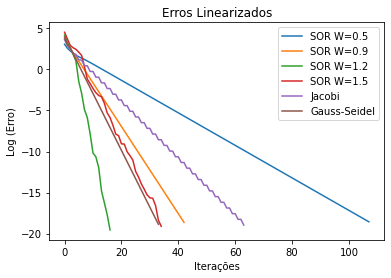

In [15]:
#Todos os gráficos linearizados
erro_jacobi_log = erro_lista_plot_jacobi
erro_gauss_seidel_log = erro_lista_plot_gauss_seidel
erro_SOR_W1_log = erro_lista_plot_W1
erro_SOR_W2_log = erro_lista_plot_W2
erro_SOR_W3_log = erro_lista_plot_W3
erro_SOR_W4_log = erro_lista_plot_W4


for i in range(len(erro_lista_plot_jacobi)):
    erro_jacobi_log[i] = np.log(erro_lista_plot_jacobi[i])
    
for i in range(len(erro_lista_plot_gauss_seidel)):
    erro_gauss_seidel_log[i] = np.log(erro_lista_plot_gauss_seidel[i])
    
for i in range(len(erro_lista_plot_W1)):
    erro_SOR_W1_log[i] = np.log(erro_lista_plot_W1[i])
    

for i in range(len(erro_lista_plot_W2)):
    erro_SOR_W2_log[i] = np.log(erro_lista_plot_W2[i])
    
for i in range(len(erro_lista_plot_W3)):
    erro_SOR_W3_log[i] = np.log(erro_lista_plot_W3[i])
    
for i in range(len(erro_lista_plot_W4)):
    erro_SOR_W4_log[i] = np.log(erro_lista_plot_W4[i])
    
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.set_ylabel('Log (Erro)')
ax1.set_xlabel('Iterações')
plt.plot(iterations_lista_W1, erro_SOR_W1_log)
plt.plot(iterations_lista_W2, erro_SOR_W2_log)
plt.plot(iterations_lista_W3, erro_SOR_W3_log)
plt.plot(iterations_lista_W4, erro_SOR_W4_log)
plt.plot(iterations_lista_jacobi, erro_jacobi_log)
plt.plot(iterations_lista_gauss_seidel, erro_gauss_seidel_log)


plt.legend(["SOR W=0.5", "SOR W=0.9", "SOR W=1.2","SOR W=1.5", "Jacobi", "Gauss-Seidel"])
plt.title("Erros Linearizados")    

    